# Spotify Popularity Prediction

An independent record label is aiming to improve their artists album sales. To do it, they intend to apply Machine Learning in order to sculpt their songs in a more comercial way. The first attempt to do it is using Spotify Popularity feature. This feature measures a song success based on how many listenings a song had. The label firmly believe that some features can be good predictors of a song success and they want to know what are them. Also the label wants to predict with maximum accuracy how well a song will perform on Spotify every time a new song is releasen. We will create a model based on 19k songs available on Spotify and its main features, such as energy, key, loudness and many others.

## 1. Data wrangling

The first step we are going to perform in this project is to import all the necessary libraries to data wrangling and data exploration. We need to explore our data in depth to gain knowledge about these songs features and its correlation before performing any modelling.

### 1.1 Importing data 

We'll deal with a couple of libraries in this project: NumPy, pandas, matplotlib, Seaborn and Scikit Learn. Let's import them first.

In [2]:
# Importing libraries for data wrangling and data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing necessary Scikit-Learn modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# Importing benchmark model
from sklearn.linear_model import LinearRegression

# Importing comparative models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Importing metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Let's import our .csv file to our Jupyter Notebook. It requires some specific encoding parameters in order to be successfully read into our notebook.

In [3]:
# Reading raw Spotify data
data_raw = pd.read_csv('./19332_Spotify_Songs.csv', engine = 'c', encoding = "ISO-8859-1")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Next we are going to take a general look to our dataframe in order to see if it was successfully read.

In [4]:
# Checking data_raw initial observations
data_raw.head(10)

,id,artists,available_markets,disc_number,duration_ms.x,explicit,href,is_local,name,popularity,...,instrumentalness,liveness,valence,tempo,type.y,uri.y,track_href,analysis_url,duration_ms.y,time_signature
0,000xQL6tZNLJzIrtIgxqSl,https://api.spotify.com/v1/artists/5ZsFI1h6hId...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,188490,FALSE,https://api.spotify.com/v1/tracks/000xQL6tZNLJ...,FALSE,Still Got Time (feat. PARTYNEXTDOOR),63,...,0.000000,0.0852,0.5240,120.963,audio_features,spotify:track:000xQL6tZNLJzIrtIgxqSl,https://api.spotify.com/v1/tracks/000xQL6tZNLJ...,https://api.spotify.com/v1/audio-analysis/000x...,188491.0,4.0
1,001UkMQHw4zXfFNdKpwXAF,https://api.spotify.com/v1/artists/0XKOBt59crn...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,191053,FALSE,https://api.spotify.com/v1/tracks/001UkMQHw4zX...,FALSE,Brand New Man - with Luke Combs,68,...,0.000079,0.2900,0.5620,127.061,audio_features,spotify:track:001UkMQHw4zXfFNdKpwXAF,https://api.spotify.com/v1/tracks/001UkMQHw4zX...,https://api.spotify.com/v1/audio-analysis/001U...,191053.0,4.0
2,003FTlCpBTM4eSqYSWPv4H,https://api.spotify.com/v1/artists/3vAaWhdBR38...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,233266,FALSE,https://api.spotify.com/v1/tracks/003FTlCpBTM4...,FALSE,"Swing, Swing",67,...,0.128000,0.0385,0.3180,127.947,audio_features,spotify:track:003FTlCpBTM4eSqYSWPv4H,https://api.spotify.com/v1/tracks/003FTlCpBTM4...,https://api.spotify.com/v1/audio-analysis/003F...,233267.0,4.0
3,003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/artists/0C0XlULifJt...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,222973,FALSE,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,FALSE,Mr. Brightside,80,...,0.000000,0.0995,0.2360,148.033,audio_features,spotify:track:003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,https://api.spotify.com/v1/audio-analysis/003v...,222973.0,4.0
4,005lwxGU1tms6HGELIcUv9,https://api.spotify.com/v1/artists/6jJ0s89eD6G...,"CA, JP, US",1,179640,FALSE,https://api.spotify.com/v1/tracks/005lwxGU1tms...,FALSE,I Kissed A Girl,68,...,0.000000,0.1320,0.6960,129.996,audio_features,spotify:track:005lwxGU1tms6HGELIcUv9,https://api.spotify.com/v1/tracks/005lwxGU1tms...,https://api.spotify.com/v1/audio-analysis/005l...,179640.0,4.0
5,007EFIByaEW4dgEcIbfBg9,https://api.spotify.com/v1/artists/1dKdetem2xE...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,170626,FALSE,https://api.spotify.com/v1/tracks/007EFIByaEW4...,FALSE,Hasta Que un dÃ­,58,...,0.000000,0.1520,0.3680,134.958,audio_features,spotify:track:007EFIByaEW4dgEcIbfBg9,https://api.spotify.com/v1/tracks/007EFIByaEW4...,https://api.spotify.com/v1/audio-analysis/007E...,170627.0,4.0
6,009ImBOrIUlWgla8U05RAC,https://api.spotify.com/v1/artists/6jJ0s89eD6G...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,228878,FALSE,https://api.spotify.com/v1/tracks/009ImBOrIUlW...,FALSE,Unconditionally,70,...,0.000000,0.2080,0.3530,128.902,audio_features,spotify:track:009ImBOrIUlWgla8U05RAC,https://api.spotify.com/v1/tracks/009ImBOrIUlW...,https://api.spotify.com/v1/audio-analysis/009I...,228879.0,4.0
7,009thiR2SWpG6jXqXYX2AT,https://api.spotify.com/v1/artists/4qxGMBS25xD...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,152784,FALSE,https://api.spotify.com/v1/tracks/009thiR2SWpG...,FALSE,Cuantas Amantes,53,...,0.872000,0.1140,0.4220,93.952,audio_features,spotify:track:009thiR2SWpG6jXqXYX2AT,https://api.spotify.com/v1/tracks/009thiR2SWpG...,https://api.spotify.com/v1/audio-analysis/009t...,152784.0,4.0
8,00bOuKgzbRkOHmgCAL7ChZ,https://api.spotify.com/v1/artists/0QJKELJZZuL...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,271680,FALSE,https://api.spotify.com/v1/tracks/00bOuKgzbRkO...,FALSE,Zoning,50,...,0.408000,0.1060,0.0369,104.978,audio_features,spotify:track:00bOuKgzbRkOHmgCAL7ChZ,https://api.spotify.com/v1/tracks/00bOuKgzbRkO...,https://api.spotify.com/v1/audio-analysis/00bO...,271680.0,4.0
9,00c9KIdlwZUXQvhF5gz4zM,https://api.spotify.com/v1/art

In [5]:
# Checking data shape
data_raw.shape

(19335, 46)

Our data is ok, but it needs a lot of transformation in order to fit a model. We'll deal with this in the next steps.

### 1.2 Processing the data

Unfortunately, we can't display every feature present in our dataframe using "head" method. We might check its columns and their datatypes.

In [6]:
# Checking data columns
print(data_raw.columns)

Index(['id', 'artists', 'available_markets', 'disc_number', 'duration_ms.x',
       'explicit', 'href', 'is_local', 'name', 'popularity', 'preview_url',
       'track_number', 'type.x', 'uri.x', 'album.album_type', 'album.artists',
       'album.available_markets', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri',
       'album.external_urls.spotify', 'external_ids.isrc',
       'external_urls.spotify', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type.y', 'uri.y', 'track_href', 'analysis_url',
       'duration_ms.y', 'time_signature'],
      dtype='object')


In [7]:
# Checking data dtypes
print(data_raw.dtypes)

id                               object
artists                          object
available_markets                object
disc_number                       int64
duration_ms.x                    object
explicit                         object
href                             object
is_local                         object
name                             object
popularity                       object
preview_url                      object
track_number                     object
type.x                           object
uri.x                            object
album.album_type                 object
album.artists                    object
album.available_markets          object
album.href                       object
album.id                         object
album.images                     object
album.name                       object
album.release_date               object
album.release_date_precision     object
album.total_tracks               object
album.type                       object


There are some problems with lines 7398 and 12599. They present string values in numeric columns. Let's drop those lines before dropping our selected columns.

In [8]:
# Dropping observation with problem
data_raw.iloc[12599] = None
data_raw.iloc[7398] = None

Let's look for missing values in our data. A regression model cannot handle missing values automatically.

In [9]:
# Checking for missing values
data_raw.isnull().sum()

id                                 4
artists                            2
available_markets                  2
disc_number                        2
duration_ms.x                      2
explicit                           2
href                               2
is_local                           2
name                               4
popularity                         3
preview_url                     7526
track_number                       3
type.x                             3
uri.x                              3
album.album_type                   3
album.artists                      3
album.available_markets            3
album.href                         3
album.id                           3
album.images                       3
album.name                         3
album.release_date                 4
album.release_date_precision       4
album.total_tracks                 4
album.type                         4
album.uri                          4
album.external_urls.spotify        7
e

It seems that 'preview_url' is full of missing data. Let's drop this column since it is not going to add any variance to our model.

In [10]:
# Dropping preview_url
data_raw.drop(['preview_url'], axis = 1, inplace = True)

Now we can drop any still remaining missing values in our data. "Dropna" should handle it well.

In [11]:
# Dropping missing values
data_raw.dropna(inplace = True)

In [12]:
# Checking new data shape
data_raw.shape

(19326, 45)

Now we can deliberately drop some unnecessary columns in our data. These columns are merely descriptive information about our songs and they won't aggregate any variance to our model. These descriptive features may even disrupt our model.

The remaining features may be good popularity predictors. We will check those later.

In [13]:
# Dropping unnecessary columns
data_raw.drop(['id','track_number', 'album.release_date', 'artists', 'album.total_tracks', 'available_markets', 'disc_number', 'href', 'name',
               'type.x', 'uri.x', 'album.artists','album.available_markets',
              'album.href', 'album.id', 'album.images','album.name', 'album.release_date_precision',
              'album.type', 'album.uri', 'album.external_urls.spotify','external_ids.isrc',
              'external_urls.spotify', 'type.y','uri.y', 'track_href', 'analysis_url', 'duration_ms.x'],
              axis = 1,
              inplace = True)

Some columns, including our target value, are not set as numeric. Before taking any data exploration step we need to transform these variables.

In [14]:
# Converting popularity, track_number and album.total_tracks to numeric
for column in ['popularity', 'duration_ms.y']:
    data_raw[column] = pd.to_numeric(data_raw[column])

It seems our data is ready to exploration. Let's take the next step.

## 2. Exploratory Data Analysis

The first step in our EDA is to check our target value distribution. After that we are going to analyze our features statistical atributes.

### 2.1. EDA I: Target value

Let's plot a histogram to see how popularity is distributed around our large dataset.

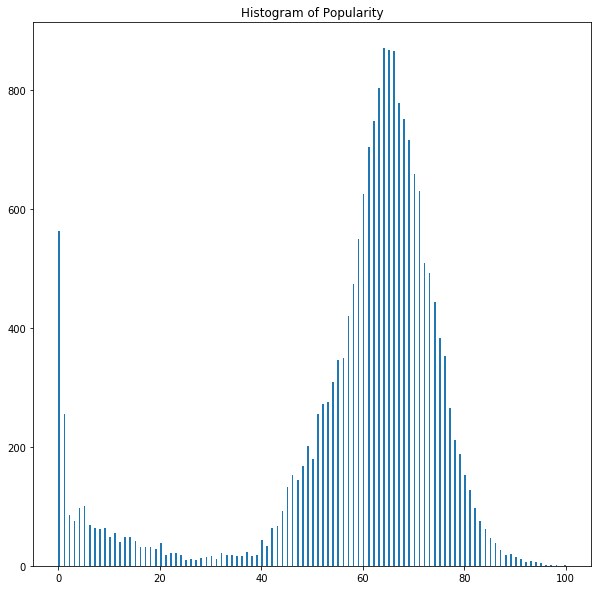

In [15]:
# Checking popularity distribution
%matplotlib inline

plt.figure(figsize=(10,10))
plt.hist(data_raw['popularity'], bins = 300)
plt.title('Histogram of Popularity')
plt.show()

It seems that our popularity variable is somehow normally distributed around a value between 60 and 70. There are some outliers with very low popularity and some other outliers that are super popular songs. There is also a huge amount of zeros, i.e., songs with no popularity at all. We can use a boxplot to visualize better the distribution of our data.

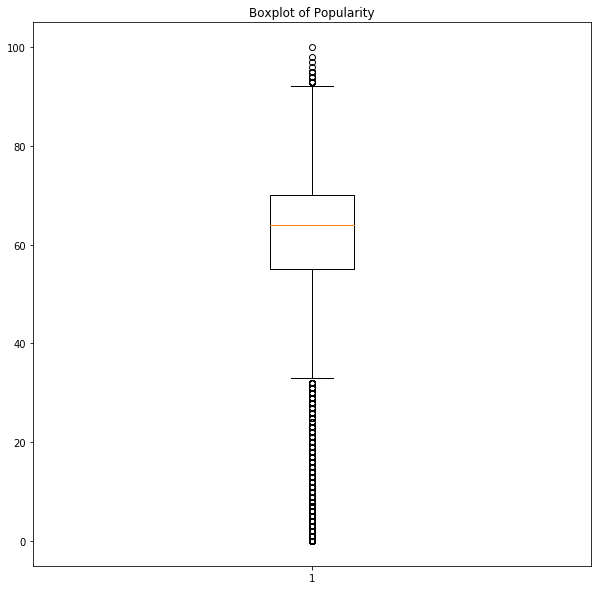

In [16]:
# Checking popularity boxplot
%matplotlib inline
plt.figure(figsize=(10,10))
plt.boxplot(data_raw['popularity'])
plt.title('Boxplot of Popularity')
plt.show()

Finally, let's describe our target variable.

In [95]:
# Checking target variable general stats
print(data_raw['popularity'].describe())

count    19326.000000
mean        58.143382
std         19.905058
min          0.000000
25%         55.000000
50%         64.000000
75%         70.000000
max        100.000000
Name: popularity, dtype: float64


It seems our data is centered around 55 and 70. Besides the huge amount of songs with no popularity at all, we can see that our variable has a considerable standard deviation. This value may serve as a reference to check our model performance later, comparing it to our score metric (RMSE).

Since our company is not really performing well in the last months, the fact that the majority of the songs are not considered "hits" shouldn't be a problem for this task. If we are capable of finding the features that are responsible for an overall good performance of a song the problem will be solved.

### 2.2 EDA II: Selected features

Now we turn our attention to the song features. We will look for high correlated features and drop them. High correlated features may be transmiting the same information and we don't want to feed the model with unnecessary variables.

Seaborn's function pairplot can be useful to take a look in general data correlation.

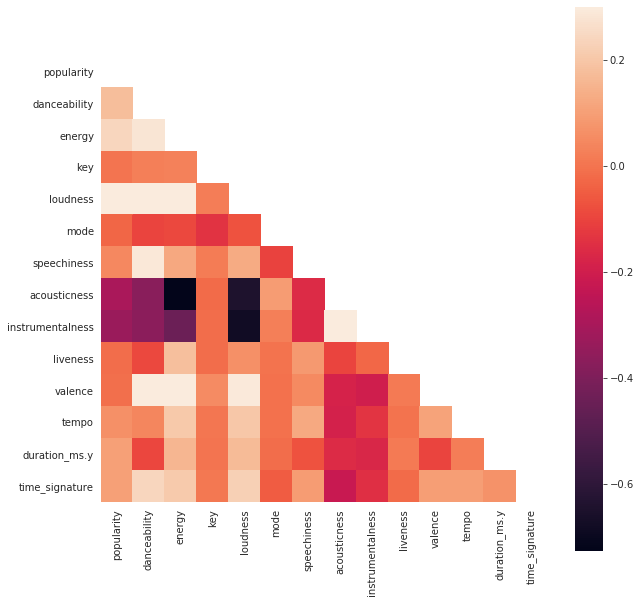

In [17]:
# Getting correlation matrix
data_corr = data_raw.corr()

# Plotting heatmap
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 10))
    ax = sns.heatmap(data_corr, mask = mask, vmax = .3, square = True)

In [97]:
# Displaying correlation matrix
data_corr[data_corr > .75]

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms.y,time_signature
popularity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,1.000000,NaN,0.770202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,0.770202,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


Although there are some high correlated features, they may not be representing the same information. We'll choose to maintain our original features.

We can use describe again to gain a general statistical knowledge about our features.

In [98]:
# Describing our data
data_raw.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms.y,time_signature
count,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.00000,19326.000000,19326.000000,1.932600e+04,19326.000000
mean,58.143382,0.616015,0.584205,5.191918,-8.605741,0.645296,0.107348,0.308685,0.102174,0.18246,0.491403,119.792183,2.086390e+05,3.896357
std,19.905058,0.179857,0.236896,3.568623,5.803629,0.478436,0.111760,0.321939,0.266967,0.14711,0.242766,30.973031,6.609247e+04,0.461137
min,0.000000,0.000000,0.000020,0.000000,-54.376000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.339000e+03,0.000000
25%,55.000000,0.507000,0.443000,2.000000,-9.714000,0.000000,0.038200,0.039500,0.000000,0.09670,0.304000,94.986250,1.727630e+05,4.000000
50%,64.000000,0.638000,0.620000,5.000000,-6.816000,1.000000,0.056500,0.175000,0.000002,0.12200,0.490000,119.892000,2.048350e+05,4.000000
75%,70.000000,0.748000,0.765000,8.000000,-5.085000,1.000000,0.127000,0.517000,0.001130,0.21900,0.678000,140.067750,2.370200e+05,4.000000
max,100.000000,0.985000,1.000000,11.000000,1.060000,1.000000,0.954000,0.996000,1.000000,0.99300,1.000000,230.401000,1.167000e+06,5.000000


It is not trivial to see how our data is distributed individually with so many scales. In this sense, it's better to normalize our data. Since we have some categorical features and we want to compare different features attributes, our best shot is MinMaxScaler.

## 3 Preprocessing data

Before normalizing our data, let's handle our categorical features. A Scikit Learn model does not handle categorical data automatically.

### 3.1. Preprocessing data I: categorical data and normalization

Since we don't have so many remaining categorical columns, pandas "get_dummies" should do the job. We don't want to have perfect collinearity between categorical variables, so its important to drop one of the binary new variables.

In [99]:
# Using one hot encoding to handle categorical data
data_raw = pd.get_dummies(data_raw, drop_first = True)

We don't want to normalize popularity, so we are going to separate it from the rest of the dataset.

In [100]:
# Getting features and target
X = data_raw.drop(['popularity'], axis = 1)
y = data_raw.popularity

# Getting X_columns
X_columns = X.columns

Now we can use Scikit-Learn function "MinMaxScaler" to normalize our data.

In [101]:
# Normalizing data
mme = MinMaxScaler()
X = pd.DataFrame(mme.fit_transform(X))
X.columns = X_columns

It is easier now to compare features standard deviation.

In [102]:
# Getting general statistics
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms.y,time_signature,explicit_TRUE,album.album_type_compilation,album.album_type_single
count,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000,19326.000000
mean,0.625396,0.584197,0.471993,0.825641,0.645296,0.112524,0.309924,0.102174,0.183746,0.491403,0.519929,0.176426,0.779271,0.298768,0.031098,0.258564
std,0.182596,0.236901,0.324420,0.104691,0.478436,0.117149,0.323232,0.266967,0.148147,0.242766,0.134431,0.056797,0.092227,0.457730,0.173587,0.437857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.514721,0.442989,0.181818,0.805650,0.000000,0.040042,0.039659,0.000000,0.097382,0.304000,0.412265,0.145596,0.800000,0.000000,0.000000,0.000000
50%,0.647716,0.619992,0.454545,0.857926,1.000000,0.059224,0.175703,0.000002,0.122860,0.490000,0.520362,0.173157,0.800000,0.000000,0.000000,0.000000
75%,0.759391,0.764995,0.727273,0.889151,1.000000,0.133124,0.519076,0.001130,0.220544,0.678000,0.607930,0.200815,0.800000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Some features have high variance, such as: mode, acousticness, key, valence and energy. We hope that these features can aggregate to the model performance.

### 3.2. Preprocessing data II: separating into train and test datasets

We need to evaluate our model performance. It is only possible if we divide our dataset into train and test datasets. We'll use Scikit-Learn function "train_test_split" to do it.

In [103]:
# Separating data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1924)

## 4. Benchmark model

In this session we will develop a benchmark model. The model chosen as a benchmark is the most simple and known regressor in Machine Learning: linear regression. We'll train the model and evaluate its performance. It will be used as a benchmark to look for more complex models aiming to improve the precision of our model.

### 4.1. Instanciating and training the model

In [104]:
# Instanciating linear regressor
lm = LinearRegression()

In [105]:
# Training linear regressor and getting predictions
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

Let's see how well it performed.

Since we'll need to visualize model performance recurrently, it will be useful to create a function to handle it automatically.

In [106]:
# Defining function to get metrics
def get_metrics(name, y_test, y_pred):
    """Calculate and print main regression metrics"""
    # Getting main regression metrics
    name = name
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, y_pred)

    # Printing the results
    print('MODEL: {}'.format(name))
    print('Mean Absolute Error: {}'.format(MAE))
    print('Mean Squared Error: {}'.format(MSE))
    print('Root Mean Squared Error: {}'.format(RMSE))
    print('R-Squared: {}'.format(R2))
    
    return [name, MAE, MSE, RMSE, R2]

In [107]:
# Getting benchmark model results
get_metrics('Linear Regression', y_test, y_pred)

MODEL: Linear Regression
Mean Absolute Error: 12.641123120807896
Mean Squared Error: 315.57581075679354
Root Mean Squared Error: 17.764453573267982
R-Squared: 0.20384604199921674


['Linear Regression',
 12.641123120807896,
 315.57581075679354,
 17.764453573267982,
 0.20384604199921674]

Our benchmark model did not performed too good. Although we have a low RMSE (16.58) our R-Squared is too low. It means that our Linear Regressor did not fit too well to the data. It simply could not capture its variance. We may look for more complex models that may improve our RMSE and R-Squared results.

## 5. Improving our modelling: looking for more complex ML models

We have chosen the following models to test: K-Neighbors Regression, Lasso Regression, Ridge Regression, Decision Tree Regression, Random Forest Regression, Extra Trees Regression, Gradient Boosting Regression an Adaboost Regression. The best way to choose between different models is to simply test them. Scikit Learn framework makes it easy to implement a bunch of models in a row. That's what what we are going to to next!

In [108]:
# Instanciating models
knr = KNeighborsRegressor()
lasso = Lasso()
ridge = Ridge()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

model_list = [knr, lasso, ridge, dtr, rfr, etr, gbr, abr]

Thanks to Scikit Learn methods to train a model and predict results from them, we can build a function to train a couple of models in a row.

In [109]:
# Defining function to train multiple models
def model_training(X_train, y_train, X_test, y_test, y_pred, model_list):
    """Train"""
    model_list = model_list
    score_list = []

    for model in model_list:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = get_metrics(model, y_test, y_pred)
        score_list.append(score)
        
    return pd.DataFrame(score_list, columns = ['Name', 'MAE', 'MSE', 'RMSE', 'R-squared'])

In [110]:
# Training multiple models and checking metric results
base_scores = model_training(X_train, y_train,
                            X_test, y_test, y_pred,
                            model_list)

base_scores

MODEL: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Mean Absolute Error: 10.44692188308329
Mean Squared Error: 236.34951888256595
Root Mean Squared Error: 15.373663157574578
R-Squared: 0.40372297712338234
MODEL: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Mean Absolute Error: 12.920056920893778
Mean Squared Error: 350.1950339407009
Root Mean Squared Error: 18.7134987092393
R-Squared: 0.11650654821899853
MODEL: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Mean Absolute Error: 12.641359730120438
Mean Squared Error: 315.5773361243572
Root Mean Squared Error: 17.76449650635664
R-Squared: 0.203842193708626
MODEL: Deci

,Name,MAE,MSE,RMSE,R-squared
0,"KNeighborsRegressor(algorithm='auto', leaf_siz...",10.446922,236.349519,15.373663,0.403723
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",12.920057,350.195034,18.713499,0.116507
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",12.641360,315.577336,17.764497,0.203842
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",12.043744,329.601035,18.154918,0.168462
4,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",8.929837,169.205308,13.007894,0.573118
5,"(ExtraTreeRegressor(ccp_alpha=0.0, criterion='...",8.700244,162.425411,12.744623,0.590223
6,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",10.781649,240.864271,15.519803,0.392333
7,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",15.606584,368.538244,19.197350,0.070229


As we can see, Random Forest Regression and Extra Trees Regression performed similarly well. There are no significant differences between both models. Let's stay with Random Forest since it is more well known.

In [111]:
# Training the final model
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [112]:
# Getting predictions
y_pred = rfr.predict(X_test)

Let's find how well it performed:

In [113]:
# Evaluating model
get_metrics('Random Forest Regressor', y_test, y_pred)

MODEL: Random Forest Regressor
Mean Absolute Error: 8.8871919065447
Mean Squared Error: 167.75726290932744
Root Mean Squared Error: 12.952114225458615
R-Squared: 0.5767717160312681


['Random Forest Regressor',
 8.8871919065447,
 167.75726290932744,
 12.952114225458615,
 0.5767717160312681]

## 6. Results

We have a model! Let's see how it performed.

### 6.1 Feature importance

With Scikit Learn we can get the score of feature importance. Let's see what features are relevant to a song popularity.

Feature 0 - Score: 0.07555
Feature 1 - Score: 0.06385
Feature 2 - Score: 0.02697
Feature 3 - Score: 0.12096
Feature 4 - Score: 0.00590
Feature 5 - Score: 0.06657
Feature 6 - Score: 0.20890
Feature 7 - Score: 0.04403
Feature 8 - Score: 0.05907
Feature 9 - Score: 0.06349
Feature 10 - Score: 0.09648
Feature 11 - Score: 0.05360
Feature 12 - Score: 0.00723
Feature 13 - Score: 0.01175
Feature 14 - Score: 0.00591
Feature 15 - Score: 0.08975


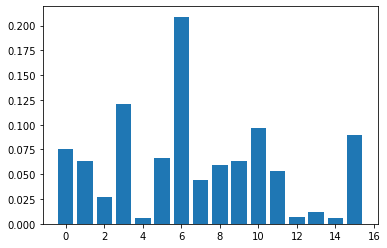

In [114]:
# Getting feature importances
feature_importance = rfr.feature_importances_

# Summarizing feature importance
for i,v in enumerate(feature_importance):
    print('Feature %0d - Score: %.5f' % (i,v))
    
# Plotting feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

In [115]:
# Printing features
X_train.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms.y', 'time_signature', 'explicit_TRUE',
       'album.album_type_compilation', 'album.album_type_single'],
      dtype='object')

As we can see, the top variables are:
- Feature 6 (Speechiness): 20,89%
- Feature 3 (Key): 12,10%
- Feature 10 (Valence): 9,65%

It seems that speechiness is a good predictor of a song's popularity. Explosions in the Sky would be sad to know this.

Also Key explains a song popularity and Valence. 

The independent record label should take a more closer look to these variables on the next recording.

### 6.2 Comparing result to benchmark model

Here are the general results of Linear Regression (benchmark):
- MODEL: Linear Regression
- Mean Absolute Error: 12.641123120807896
- Mean Squared Error: 315.57581075679354
- Root Mean Squared Error: 17.764453573267982
- R-Squared: 0.20384604199921674

And here are the results of Random Forest Regression (chosen model):
- MODEL: Random Forest Regressor
- Mean Absolute Error: 8.8871919065447
- Mean Squared Error: 167.75726290932744
- Root Mean Squared Error: 12.952114225458615
- R-Squared: 0.5767717160312681

Our Random Forest Regression model had a superior performance in comparison to the benchmark. It was over 30 p.p. R-squared gain over the benchmark. Also our RMSE lowered 5 p.p., indicating that this model is superior and capable of providing more accurate predictions of a song popularity.